# Task 6

In [2]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications
import numpy as np

In [4]:
def get_length(Path, Pattern):
    # Pattern: name of the subdirectory
    Length = len(os.listdir(os.path.join(Path, Pattern)))
    return Length

In [5]:
import matplotlib.pyplot as plt
a = plt.imread('/DL_course_data/Lab2/Skin/train/Mel/Mel358.jpg')
a.shape


(450, 600, 3)

In [6]:
train_data_dir = '/DL_course_data/Lab2/Skin/train/'
validation_data_dir = '/DL_course_data/Lab2/Skin/validation/'
img_width, img_height = 600,450
epochs = 150
batch_size = 8
LR = 0.00001

In [7]:
Len_C1_Train = get_length(train_data_dir,'Mel')
Len_C2_Train = get_length(train_data_dir,'Nevi')
Len_C1_Val = get_length(validation_data_dir,'Mel')
Len_C2_Val = get_length(validation_data_dir,'Nevi')

In [8]:
# loading the pre-trained model
# include top: false means that the dense layers at the top of the network will not be used.
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
# Feature extraction from pretrained VGG (training data)
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode=None,
shuffle=False)
# Extracting the features from the loaded images
features_train = model.predict_generator(
train_generator,
(Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)

val_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

features_validation = model.predict_generator(
        val_generator,
        (Len_C1_Val+Len_C2_Val) // batch_size, max_queue_size=1)


In [19]:
train_data = features_train
train_labels = np.array([0] * int(Len_C1_Train) + [1] * int(Len_C2_Train))

validation_data = features_validation
validation_labels = np.array([0] * int(Len_C1_Val) + [1] * int(Len_C2_Val))

In [20]:
# Building the MLP model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer=Adam(lr = LR),loss='binary_crossentropy', metrics=['accuracy'])


History = model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 129024)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16515200  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,515,329
Trainable params: 16,515,329
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150
125/125 [==============================] - 1s 9ms/step - loss: 0.6306 - accuracy: 0.6280 - val_loss: 0.5032 - val_accuracy: 0.8100
Epoch 2/150
125/125 [==============================] - 1s 7ms/step - loss: 0.5025 - accuracy: 0.7810 - val_loss: 0.4302 - val_accuracy: 0.8450
Epoch 3/150
125/125 [==============================] - 1s 7ms/step - loss: 0.4672 - accuracy: 0.7820 - val_loss: 0.4716 - val_accuracy: 0.7450
Epoch 4/150
125/125 [==============================] - 1s 7ms/step - loss: 0.4392 - accuracy: 0.8010 - val_loss: 0.4303 - val_accuracy: 0.8150
Epoch 5/150
125/125 [==============================] - 1s 7ms/step - loss: 0.4018 - accuracy: 0.8300 - val_loss: 0.3745 - val_accuracy: 0.8500
Epoch 6/150
125/125 [==============================] - 1s 7ms/step - loss: 0.3733 - accuracy: 0.8420 - val_loss: 0.3714 - val_accuracy: 0.8400
Epoch 7/150
125/125 [==============================] - 1s 7ms/step - loss: 0.3745 - accuracy: 0.8330 - val_loss: 0.3887 - val_accuracy: 0.8250

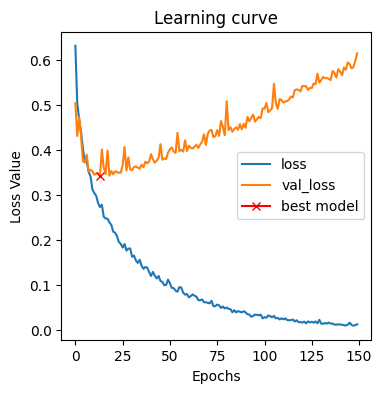

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

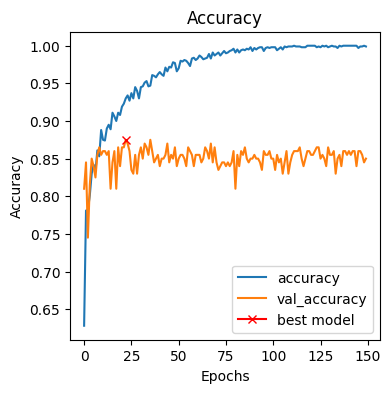

: 

In [22]:
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(History.history["val_accuracy"]),
         np.max(History.history["val_accuracy"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()